# DLCV Assignment 1

**Due Date: 17/02/2023 11:59PM IST**

**Name:Puspa Sahu**

**Sr. No.: 21676**


In this assignment, we will cover the following topics:

1) Training a simple Linear Model 

2) Implementing Modules with Backprop functionality

3) Implementing Convolution Module on Numpy


It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like caffe,pytorch etc), which directly give functions for these steps, are to be used. 

# Training a simple Linear Model

In this section, you will write the code to train a Linear Model. The goal is to classify an input $X_i$ of size $n$ into one of $m$ classes. For this, you need to consider the following:

1)  **Weight Matrix** $W_{n\times m}$: The Weights are multipled with the input $X_i$ (vector of size $n$), to find $m$ scores $S_m$ for the $m$ classes.

2)  **The Loss function**:   
  * The Cross Entropy Loss: By interpreting the scores as unnormalized log probabilities for each class, this loss tries to measure dissatisfaction with the scores in terms of the log probability of the right class:

$$
L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}
$$

where $f_{ y_i }$ is the $y_i$-th element of the output of $W^T  X_i$

3) **A Regularization term**: In addition to the loss, you need a Regularization term to lead to a more distributed (in case of $L_2$) or sparse (in case of $L_1$) learning of the weights. For example, with $L_2$ regularization, the loss has the following additional term:

$$
R(W) = \sum_k\sum_l W_{k,l}^2  
$$

Thus the total loss has the form:
$$
L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$$

4) **An Optimization Procedure**: This refers to the process which tweaks the weight Matrix $W_{n\times m}$ to reduce the loss function $L$. In our case, this refers to Mini-batch Gradient Descent algorithm. We adjust the weights $W_{n\times m}$, based on the gradient of the loss $L$ w.r.t. $W_{n\times m}$. This leads to:
$$
W_{t+1} = W_{t} - \alpha \frac{\partial L}{\partial W},
$$
where $\alpha$ is the learning rate. Additionally, with "mini-batch" gradient descent, instead of finding loss over the whole dataset, we use a small sample $B$ of the training data to make each learning step. Hence,
$$
W_{t+1} = W_{t} - \alpha \frac{\partial \sum_{i \in B}{L_{x_i}}}{\partial W},
$$
where $|B|$ is the batch size.

# Question 1

Train a **Single-Layer Classifier** for the MNIST dataset. 
* Use Softmax-Loss.
* Maintain a train-validation split of the original training set for finding the right value of $\lambda$ for the regularization, and to check for over-fitting.
* Finally, evaluate the classification performance on the test-set.


(60000, 784)
(60000,)
(10000, 784)
(10000,)


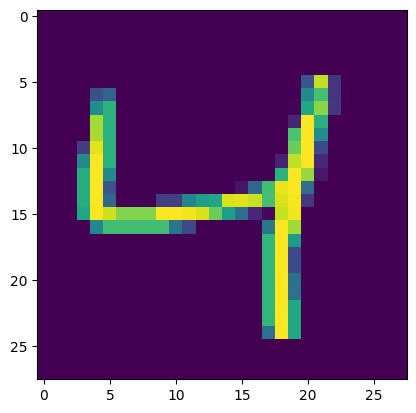

In [234]:
import struct
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np



with open('trainimagemnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_image = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_image = train_image.reshape((size,-1))
    plt.imshow(train_image[2].reshape((28,28)))
    print(train_image.shape)
    
with open('trainlabelmnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    train_label=np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    print(train_label.shape)    
with open('testimagemnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    test_image = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_image = test_image.reshape((size,-1))
    print(test_image.shape)    
with open('testlabelmnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    test_label=np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    print(test_label.shape)

In [235]:
# Define the class for a Single Layer Classifier
class Single_layer_classifier():
    
    def __init__(self, input_size, output_size):
        
        ## WRITE CODE HERE
        self.input_size=input_size
        self.output_size=output_size
        self.int_var=0.01
        self.lmda=0.1
        self.weights=np.random.normal(0,self.int_var,size=(input_size,output_size))
        self.learning_parameter=0.00001
        
        # Give the instance a weight matrix, initialized randomly
        # One possible strategy for a good initialization is Normal (0, σ) where σ = 1e-3.
        # Try experimenting with different values of σ.
        
    # Define the forward function
    def forward(self, input_x):
        
        input_x=input_x.reshape((784,1))
        
        scores=np.dot(self.weights.T,input_x)
        
        #standardising
        #scores=scores-min(scores)/(max(scores)-min(scores))
        scores=scores-np.mean(scores)/np.std(scores)
        return scores
    
    # Similarly a backward function
    # we define 2 backward functions (as Loss = L_data + L_reg, grad(Loss) = grad(L1) + grad(L2))
    
    def backward_Ldata(self, grad_from_loss,input_x):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the loss w.r.t. the corresponding element of W
        
        input_x=input_x.reshape((784,1))
        
        grad_from_loss=grad_from_loss.reshape((10,1))
       
        grad_matrix=np.matmul(input_x,grad_from_loss.T)
        
        
        return grad_matrix
        
    def backward_Lreg(self):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the regularization-term
        # w.r.t. the corresponding element of W
        
        ## WRITE CODE HERE
        
        grad_matrix=2*self.weights
        #print(grad_matrix.shape)
        
        return grad_matrix
    def backward(self,grad_mat1,grad_mat2):
        
        self.weights=self.weights - self.learning_parameter*(grad_mat1+self.lmda*grad_mat2)
        

In [236]:

def loss_function(input_y,scores):

    sm=np.exp(scores)/(sum(np.exp(scores)))

    loss= -1*math.log(sm[input_y])
    

    return loss


def loss_backward(loss,scores,input_y):
    # This part deals with the gradient of the loss w.r.t the output of network
    # for example, in case of softmax loss(-log(q_c)), this part gives grad(loss) w.r.t. q_c
    # pass this to backward_ldata

    
    one_hot=np.zeros((10,1))
    one_hot[input_y]=1
    x=np.exp(scores)/sum(np.exp(scores))
    
    
    grad_from_loss=np.subtract(x,one_hot)
    
    

    return grad_from_loss
        

### Create utility functions for calculating training and validation accuracy

In [237]:
## Load The Mnist data:
# Download data from http://yann.lecun.com/exdb/mnist/
# load the data.

# maintain a train-val split

# Now, write a generator that yields (random) mini-batches of the input data
# Do not use same set of mini-batches for different epochs
    
def get_minibatch(training_x=train_image, training_y=train_label,batch_size=64):
    indexes=np.arange(train_image.shape[0])
    np.random.shuffle(indexes)
    for i in range(0,len(indexes),batch_size):
        mini_x=train_image[indexes[i:i+batch_size]]
        mini_y=train_label[indexes[i:i+batch_size]]
        yield mini_x,mini_y

In [238]:
# Finally the trainer:
# Make an instance of Single_layer_classifier
# Train for t epochs:
###  Train on the train-set obtained from train-validation split
###  Use the mini-batch generator to get each mini-batch

batch_size=150
obj=Single_layer_classifier(784,10)
max_epochs=2
min_loss=math.inf
batch_loss=[]
for j in range(max_epochs):
    minibatch=get_minibatch(train_image,train_label,batch_size)

    for batch_id,(input_x , input_y) in enumerate(minibatch):
        loss=0
        cur_loss=0
        grad_mat=np.zeros((784,10))
        for i in range(batch_size):
            score=obj.forward(input_x[i])
            cur_loss=loss_function(input_y[i],score)
            
            loss+=cur_loss
            grad_loss=loss_backward(cur_loss,score,input_y[i])
            grad_mat+=((obj.backward_Ldata(grad_loss,input_x[i]))/batch_size)

            
        grad_mat2=obj.backward_Lreg()
        obj.backward(grad_mat,grad_mat2)

        min_loss=min(min_loss,loss/batch_size)
        batch_loss.append(loss/batch_size)

        
print(len(batch_loss))
plt.plot(batch_loss) 

print(min_loss)

        

KeyboardInterrupt: 

In [ ]:
def final_report():
    n=len(train_image)
    s=0
    for i in range(n):
        score=obj.forward(train_image[i])
        yred=np.argmax(score)
        s+=(yred==train_label[i])
    print(f"train accuracy: {s/n}")
    n=len(test_image)
    s=0
    for i in range(n):
        score=obj.forward(test_image[i])
        yred=np.argmax(score)
        s+=(yred==test_label[i])
    print(f"test accuracy: {s/n}")
        
final_report()

### Find the accuracy on the validation set

In [ ]:
# WRITE CODE HERE

In [ ]:
# The next step is to find the optimal value for lambda, number of epochs, learning rate and batch size. 
# CHOSE ANY TWO from the above mentioned to tune.
# Create plot and table to show the effect of the hparams.

### Report final performance on MNIST test set

In [ ]:
# WRITE CODE HERE

### Find the best performing class and the worst performing class

In [ ]:
# WRITE CODE HERE

# Training a Linear Classifier on MNIST from scikit-learn

In this section you have to train a linear classifier from the scikit-learn library and compare its results against your implementation.
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
    # WRITE CODE HERE 

### Compare the training and test accuracies for the your implementation and linear classifier from scikit-learn

In [ ]:
    # WRITE CODE HERE

### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [ ]:
# WRITE CODE HERE

# Implementing Backpropagation

Now that you have had some experience with single layer networks, we can proceed to more complex architectures. But first we need to completely understand and implement backpropagation.

## Backpropagation:

Simply put, a way of computing gradients of expressions through repeated application of chain rule. If
$$
L = f (g (h (\textbf{x})))
$$
then, by the chain rule we have:
$$
\frac{\partial L}{\partial \textbf{x}} = \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial h} \cdot \frac{\partial h}{\partial \textbf{x}} 
$$

** Look into the class Lecture for more detail **



# Question 2 : Scalar Backpropagation

Evaluate the gradient of the following function w.r.t. the input:

$$ f(x,y,z) =  log(\sigma(\frac{cos(\pi \times x)+sin(\pi \times y/2)}{tanh(z^2)}))$$
where $\sigma$ is the sigmoid function. Find gradient for the following inputs:
  * $(x,y,z)$ =  (2,4,1)
  * $(x,y,z)$ =  (9,14,3)
  * $(x,y,z)$ =  (128,42,666)
  * $(x,y,z)$ =  (52,14,28)

      

In [ ]:
import numpy as np
import math
class sigmoid():
    def __init__(self):
        self.input=None
        self.output=None
    def forward(self,inp):
        self.input=inp
        self.output=1/(1+np.exp(-1*inp))
        
        return self.output
    def backward(self):
        input_grad=self.output*(1-self.output)
        return input_grad

class log():
    def __init__(self):
        self.input=None
        self.output=None
    def forward(self,inp):
        self.input=inp
        self.output=np.log(inp)
        
        return self.output
    def backward(self):
        input_grad=1/self.input
        return input_grad
        

In [ ]:
# Now write the class func
# which constructs the graph (all operators), forward and backward functions.

class Func():
    def __init__(self):
        self.x=0
        self.y=0
        self.z=0
        self.L=0
        self.S=0
        self.c=0
        self.s=0
        self.d=0
        self.ins=0
    def forward(self,x,y,z):
        self.x=x
        self.y=y
        self.z=z
        
        self.c=np.cos(math.pi*self.x)
        self.s=np.sin(math.pi*self.y/2)
        self.d=np.tanh(z**2)
        
        self.ins=(self.c+self.s)/self.d
        
        
        self.S=sigmoid().forward(self.ins)
        self.L=log().forward(self.S)
        
        return self.L
    
    def backward(self):
        grad_x,grad_y,grad_z=1,1,1
        
        grad_L=(1/self.S)
        grad_S=self.S*(1-self.S)*grad_L
        
        grad_x=(-np.sin(math.pi*self.x)*math.pi)/self.d
        grad_x*=grad_S
        
        grad_y=(np.cos(math.pi*self.y/2)*math.pi/2)/self.d
        grad_y*=grad_S
        
        grad_z=(-1/self.d**2)*(self.c+self.s)*(1-self.d**2)*2*self.z
        grad_z*=grad_S
        
        return [grad_x,grad_y,grad_z]
    

In [ ]:
model=Func()
model.forward(2,4,1)
print(model.backward())
model.forward(9,14,3)
print(model.backward())
model.forward(52.0,14.0,28.0)
print(model.backward())


In [ ]:
import torch

def f(x, y, z):
    return torch.log(torch.sigmoid((torch.cos(torch.tensor(np.pi) * x) + torch.sin(torch.tensor(np.pi) * y / 2)) / torch.tanh(z ** 2)))
x,y,z = 2.0,4.0,1.0
#x,y,z = 9.0,14.0,3.0
#x,y,z = 52.0,14.0,28.0

x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)
z = torch.tensor(z, requires_grad=True)

out = f(x, y, z)
print(out)
out.backward()

dx = x.grad
dy = y.grad
dz = z.grad
print(dx,dy,dz)

## Question 3 : Modular Vector Backpropagation

* Construct a Linear Layer module, implementing the forward and backward functions for arbitrary sizes.
* Construct a ReLU module, implementing the forward and backward functions for arbitrary sizes.
* Create a 2 layer MLP using the constructed modules.

* Modifying the functions built in Question 1 , train this two layer MLP for the same data set, MNIST, with the same train-val split.

### Plot the training loss and training accuracy plot

In [ ]:
# Use the same utility functions defined in the previous question
# WRITE CODE HERE

### Find the accuracy on the validation set

In [ ]:
# WRITE CODE HERE

In [ ]:
# Find the optimal value of learning rate and batch size. 
# Use the same tuning strategy as the previous question
# Create plot and table to show the effect of the hparams.

### Report final performance on MNIST test set

In [ ]:
# WRITE CODE HERE

### Find the best performing class and the worst performing class

In [ ]:
# WRITE CODE HERE

### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [ ]:
# WRITE CODE HERE


# Implementing a Convolution Module with Numpy

* This topic will require you to implement the Convolution operation using Numpy.
* We will use the Module for tasks like Blurring.
* Finally, we implement Backpropagation for the convolution module.


## Question 4

* Implement a naive Convolution module, with basic functionalities: kernel_size, padding, stride and dilation
  
* Test out the convolution layer by using it to do gaussian blurring on 10 random images of CIFAR-10 dataset


In [247]:
## Define a class Convolution Layer, which is initialized with the various required params:
class Convolution_Layer():
    
    def __init__(self,input_shape , filter_size ,depth, bias=True, stride=1, padding=0, dilation=1):
        kernel_size=filter_size[2]
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.normal(loc=0,scale=0.0001,size=self.kernels_shape)
    
    def corelate(self,A,B):
    
        R,C=A.shape
        r,c=B.shape
        res=np.zeros((R-r+1,C-c+1))
        for i in range(R-r+1):
            for j in range(C-c+1):
                res[i][j]=np.sum(A[i:i+r,j:j+c]*B)
        return res



    def convlolve_full(self,A,B):
        R,C=A.shape
        r,c=B.shape
        #print(r,c)
        A = np.pad(A, (r-1,c-1), constant_values=(0))
        B=np.rot90(np.rot90(B))

        return corelate(A,B)

    def forward(self,inp):
        self.input = inp
        #print(self.output_shape)
        self.output = np.zeros(self.output_shape)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += self.corelate(self.input[j], self.kernels[i, j])
        return self.output
    
    
    def backward(self, output_grad,learning_rate):
        
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)
        
        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = self.corelate(self.input[j], output_grad[i])
                input_gradient[j] += self.convlolve_full(output_grad[i], self.kernels[i, j])

        self.kernels -= learning_rate * kernels_gradient
        
        return input_gradient
    
    def set_weights(self, new_weights):
        self.kernels=new_weights
    

### Download CIFAR-10 images and load it in a numpy array (https://www.cs.toronto.edu/~kriz/cifar.html)



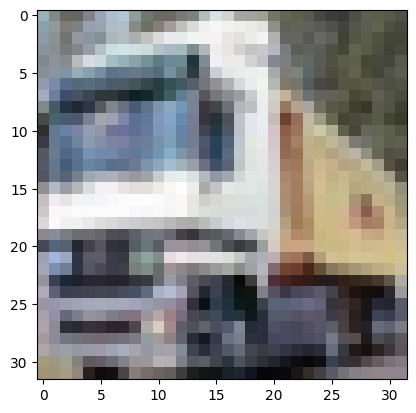

In [240]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

file = 'cifar-10-batches-py/data_batch_1'
data_batch_1 = unpickle(file)


image = data_batch_1[b'data'][1].reshape(3,32,32).transpose(1,2,0)
plt.imshow(image)
image=image.transpose(2,0,1)

### Initialize a conv layer. Set weights for gaussian blurring (do not train the filter for this part). Visualise the filters using matplotlib


In [241]:
def make_gaussian_blur(var=2,filter_size=(3,5,5)):
    d,h,w=filter_size
    fil=np.zeros(filter_size)
    for i in range(d):
        for j in range(h):
            for k in range(w):
                p=(-1/2)*(j**2+k**2)/var
                fil[i][j][k]=(1/(2*math.pi*var))*np.exp(p)
    return fil
    

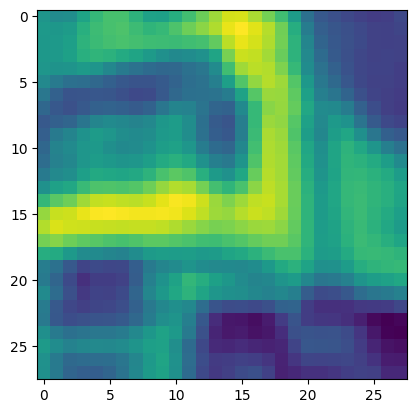

In [242]:
gaussian_blur=make_gaussian_blur(4,(3,5,5))
model=Convolution_Layer(image.shape,gaussian_blur.shape,1)
model.set_weights(gaussian_blur.reshape(1,*gaussian_blur.shape))
out=model.forward(image)
plt.imshow(out[0])

(1, 30, 30)


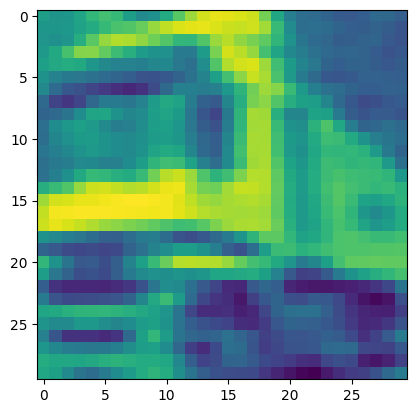

In [243]:
do_nothing=(np.zeros((3,3,3)))
do_nothing[:][1][1]=1
model=Convolution_Layer(image.shape,do_nothing.shape,1)
model.set_weights(do_nothing.reshape(1,*do_nothing.shape))
out=model.forward(image)
print(out.shape)
plt.imshow(out[0])

### Generate output for the first 5 images of the training set

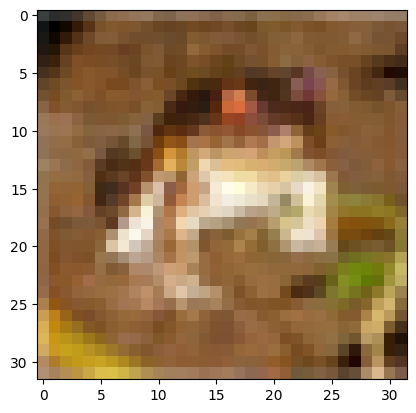

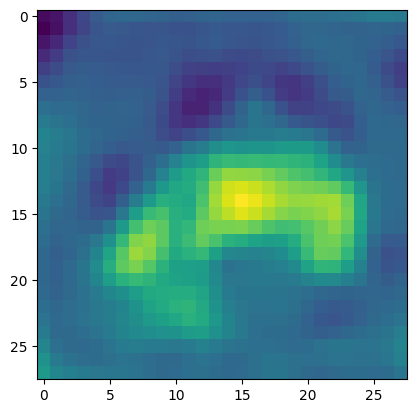

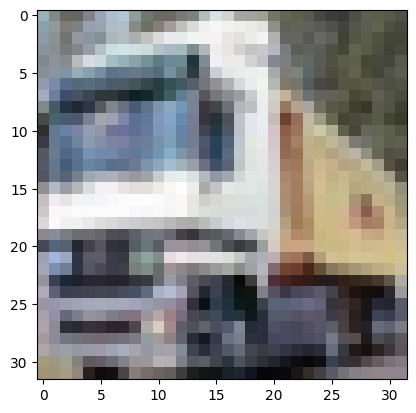

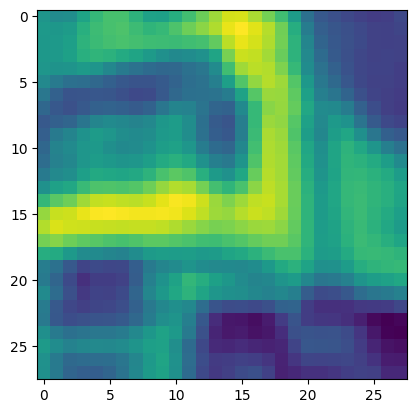

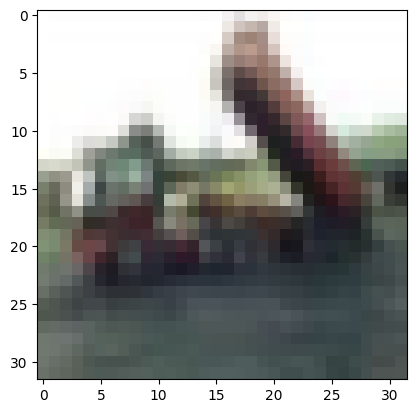

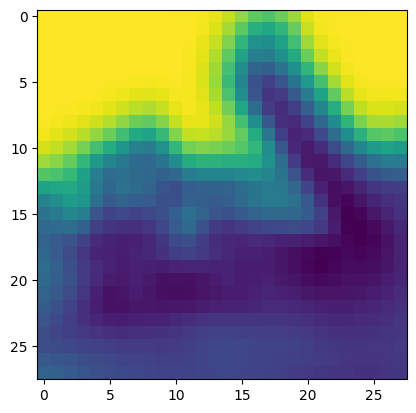

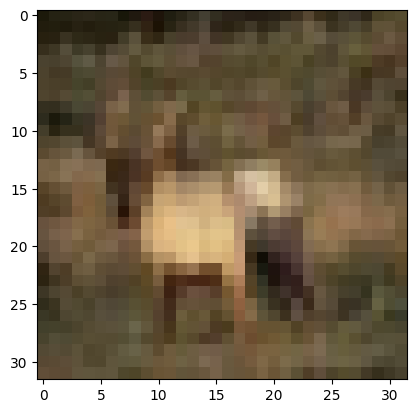

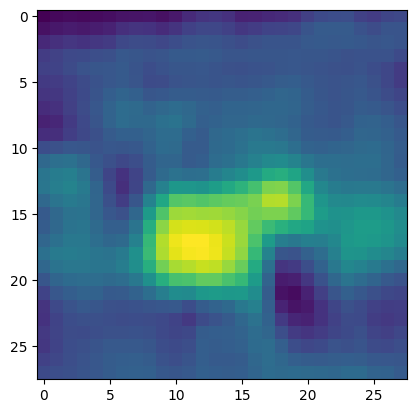

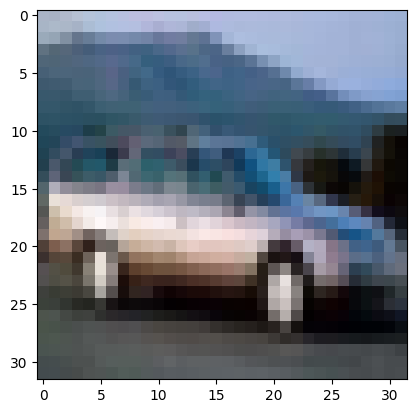

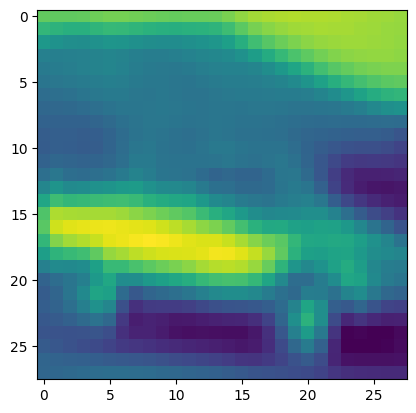

In [244]:
for i in range(5):
    image = data_batch_1[b'data'][i].reshape(3,32,32).transpose(1,2,0)
    plt.imshow(image)
    plt.show()
    image=image.transpose(2,0,1)
    
    gaussian_blur=make_gaussian_blur(4,(3,5,5))
    model=Convolution_Layer(image.shape,gaussian_blur.shape,1)
    model.set_weights(gaussian_blur.reshape(1,*gaussian_blur.shape))
    out=model.forward(image)
    plt.imshow(out[0])
    plt.show()

### Use matplotlib to show the input and corresponding blurred output

## Question 5
<br>
Now we will use this module for training a simple Convolution Layer using CIFAR-10 images. 

* The goal is to learn a set of weights, by using the backpropagation function created. To test the backpropagation, instead of training a whole network, we will train only a single layer.
  * Instantiate a Convolution  layer $C_0$ with 20 filters, each with size 5$\times$5 (RGB image, so 3 input channels). Load the given numpy array of size (20,3,5,5), which represents the weights of a convolution layer. Set the given values as the filter weights for $C_0$. Take 100 CIFAR-10 images. Save the output of these 100 images generated from this Convolution layer $C_0$. 
  
  * Now, initialize a new convolution layer $C$ with weight values sampled from uniform distribution [-1,1]. Use the $L_2$ loss between the output of this layer $C$ and the output generated in the previous step to learn the filter weights of $C_0$.


In [248]:
## Load filter weights from given numpy array "C0_weights.npy".
## Init a conv layer C_0 with these given weights

## For all images get output. Store in numpy array.

C0_weights = np.load("C0_weights.npy")
print(C0_weights.shape)


model=Convolution_Layer((3,32,32),(3,5,5),20)
model.set_weights=C0_weights
C0_out=[]
for i in range(100):
    img=data_batch_1[b'data'][i].reshape(3,32,32)/255
    out=model.forward(img)
    C0_out.append(out)
C0_out=np.array(res)
print(C0_out.shape)



(20, 3, 5, 5)
(100, 20, 28, 28)


120.33123453876804
148.72908313545992
147.05211853578243
86.39544860225404
111.28336721585801
96.58272394851423
123.25623342162687
118.60569686220978
137.34478916491426
71.61845361365643
62.167293331008686
122.78365761886396
113.74355528034907
80.24806533334173
80.59135657521014
105.55911060055313
109.57393892244981
72.57516414441912
86.25575546619592
84.54697148144248
108.43352498728507
101.01207261548834
51.62974782267378
59.749638406222864
62.461816340407445
77.78259684836452
54.229656397330004
50.87403598835652
71.5552024461146
91.42121142583447
67.60923162800654
70.971320096037
68.97451745505327
64.35912512661658
66.37041472212766
66.3123180454403
69.84839478548454
44.28073964039433
68.37544952066547
51.679757698136015
55.631862415075844
73.2508928913203
49.157990110946535
61.09021760781817
50.36965879900101
57.4722001003792
58.62915495487989
43.532664339588756
55.65838468877668
70.80051896773824
40.31346112794566
50.67939726734535
48.64808574378855
50.748993001204155
35.548226047

39.67902929374917
29.609676784479348
23.7858903859693
49.0773806545478
31.014968967666764
38.531333199513135
37.714529307381085
31.1685220560169
27.634130999465036
40.6982596872817
40.32085751972932
22.856784824181744
23.603583705732813
40.46940364127104
44.663056865419215
38.578339140417945
33.090724072363756
31.853201051530316
38.48156111975286
44.731751509783216
33.570175546127594
36.661913201404715
43.99781144020545
19.493049813937123
32.045770819372116
41.95875980231932
35.01712880037733
32.40515864794305
33.97875498798993
27.02717342972292
40.37580284454704
33.97506224061642
36.776859006204695
48.88021666853027
21.368530414279714
34.124860485579724
31.39808936552112
34.62773720274447
39.693287450047144
33.227136867197615
25.211874789430087
33.46347708292996
41.23765644692778
32.08141288733767
31.264369850177346
28.59400159231752
41.410823875430076
31.33145089721577
32.40951139814798
48.58873315492931
41.32246222575102
33.28566698516838
32.530188828299494
55.560290897434705
epoch:

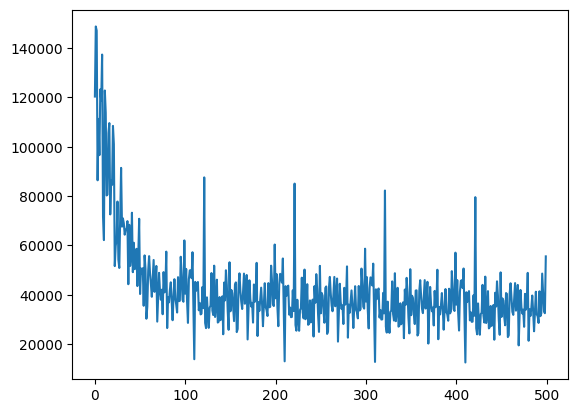

In [252]:
# for part 2 we need to write a class for the  L2 loss
class L2_loss():
    def ___init__(self):
        self.C0_output=None
        self.C_output=None
    
    def forward(self, C0_output,C_output):
        self.C0_output=C0_output
        self.C_output=C_output
        loss=np.sqrt(np.sum((C_output-C0_output)**2))
        
        return loss
    
    def backward(self,output_grad=1):
        
        grad=2*(self.C_output-self.C0_output)
        
        
        return grad


max_epochs=5
model=Convolution_Layer((3,32,32),(3,5,5),20)
L2=L2_loss()
learning_rate=0.000001
temp=[]
for epoch in range(max_epochs):
    
    for i in range(100):
        img=data_batch_1[b'data'][i].reshape(3,32,32)/255
        out=model.forward(img)
        loss=L2.forward(C0_out[i],out)
        print(loss/1000)
        temp.append(loss)
        
        out_grad=L2.backward(loss)
        model.backward(out_grad,learning_rate)
    
    print(f"epoch: {epoch}")

plt.plot(temp)
    
    
  

In [253]:
C_out_final=[]
for i in range(100):
    img=data_batch_1[b'data'][i].reshape(3,32,32)/255
    out=model.forward(img)
    C_out_final.append(out)
C_out_final=np.array(res)
print(C_out_final.shape)

(100, 20, 28, 28)
